In [3]:
import pandas as pd
import numpy as np
import random
from IPython.display import display

# Configurações iniciais
np.random.seed(42)
random.seed(42)

n_samples = 1000  # Número de registros que vamos gerar

dados = []

for _ in range(n_samples):
    is_fraude = np.random.choice([0, 1], p=[0.85, 0.15])  # 15% de fraude

    if is_fraude:
        email_tipo = np.random.choice(['temporário', 'confiável'], p=[0.7, 0.3])
        ip_anonimo = np.random.choice([True, False], p=[0.8, 0.2])
        dispositivo_novo = np.random.choice([True, False], p=[0.9, 0.1])
        tempo_formulario = np.random.normal(loc=3, scale=1)  # muito rápido
        localizacao_match = np.random.choice([True, False], p=[0.3, 0.7])
        cadastro_incompleto = np.random.choice([True, False], p=[0.6, 0.4])
        risco = 'alto'
    else:
        email_tipo = np.random.choice(['temporário', 'confiável'], p=[0.1, 0.9])
        ip_anonimo = np.random.choice([True, False], p=[0.1, 0.9])
        dispositivo_novo = np.random.choice([True, False], p=[0.2, 0.8])
        tempo_formulario = np.random.normal(loc=12, scale=3)  # mais lento e natural
        localizacao_match = np.random.choice([True, False], p=[0.9, 0.1])
        cadastro_incompleto = np.random.choice([True, False], p=[0.2, 0.8])
        risco = 'baixo' if tempo_formulario > 7 else 'médio'

    dados.append([
        email_tipo,
        ip_anonimo,
        dispositivo_novo,
        max(1, round(tempo_formulario, 1)),  # nunca menor que 1
        localizacao_match,
        cadastro_incompleto,
        risco
    ])

# Criação do DataFrame
colunas = [
    'Tipo de Email', 'IP Anônimo', 'Dispositivo Novo',
    'Tempo Formulário (seg)', 'Localização Combina',
    'Cadastro Incompleto', 'Nível de Risco'
]

df = pd.DataFrame(dados, columns=colunas)

# Configurações para melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# Função para estilizar o DataFrame (versão atualizada sem warnings)
def style_dataframe(df):
    styles = [
        {'selector': 'th', 'props': [('background-color', '#f7f7f7'),
                                    ('color', '#333'),
                                    ('font-weight', 'bold'),
                                    ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
        {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#e6f3ff')]}
    ]
    
    # Substitui applymap por map conforme recomendação
    styled_df = (df.style
                .set_table_styles(styles)
                .format({'Tempo Formulário (seg)': '{:.1f}'})
                .set_caption('Dados de Risco de Fraude')
                .map(lambda x: 'color: red' if x == 'alto' else 
                    ('color: orange' if x == 'médio' else 
                    'color: green'), subset=['Nível de Risco']))
    return styled_df

# Visualização no Jupyter Notebook
print("\n" + "="*80)
print("DATASET DE RISCO DE FRAUDE".center(80))
print("="*80 + "\n")

display(style_dataframe(df.head(30)))

# Estatísticas resumidas
print("\n" + "="*80)
print("ESTATÍSTICAS RESUMIDAS".center(80))
print("="*80 + "\n")
display(df.describe(include='all'))


                           DATASET DE RISCO DE FRAUDE                           



,Tipo de Email,IP Anônimo,Dispositivo Novo,Tempo Formulário (seg),Localização Combina,Cadastro Incompleto,Nível de Risco
0,confiável,False,False,11.3,True,False,baixo
1,confiável,True,False,11.3,True,False,baixo
2,confiável,False,False,6.8,True,True,médio
3,confiável,False,False,10.3,True,False,baixo
4,temporário,False,True,10.2,True,False,baixo
5,confiável,True,False,11.1,True,False,baixo
6,confiável,False,True,14.2,True,True,baixo
7,confiável,False,False,12.5,True,False,baixo
8,confiável,False,False,10.0,True,False,baixo
9,confiável,False,True,13.8,True,True,baixo



                             ESTATÍSTICAS RESUMIDAS                             



,Tipo de Email,IP Anônimo,Dispositivo Novo,Tempo Formulário (seg),Localização Combina,Cadastro Incompleto,Nível de Risco
count,1000,1000,1000,1000.000000,1000,1000,1000
unique,2,2,2,NaN,2,2,3
top,confiável,False,False,NaN,True,False,baixo
freq,815,799,695,NaN,802,736,823
mean,NaN,NaN,NaN,10.731400,NaN,NaN,NaN
std,NaN,NaN,NaN,4.115414,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.600000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,13.700000,NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
df_ml = df.copy()

# Transformar valores booleanos e categorias em números
for coluna in df_ml.columns:
    if df_ml[coluna].dtype == 'object':
        le = LabelEncoder()
        df_ml[coluna] = le.fit_transform(df_ml[coluna])


In [7]:
X = df_ml.drop('Nível de Risco', axis=1)
y = df_ml['Nível de Risco']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
modelo = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [15]:
print(export_text(modelo, feature_names=list(X.columns)))


|--- Tempo Formulário (seg) <= 7.05
|   |--- Tempo Formulário (seg) <= 5.20
|   |   |--- Dispositivo Novo <= 0.50
|   |   |   |--- Tipo de Email <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Tipo de Email >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Dispositivo Novo >  0.50
|   |   |   |--- class: 0
|   |--- Tempo Formulário (seg) >  5.20
|   |   |--- Tempo Formulário (seg) <= 5.60
|   |   |   |--- IP Anônimo <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- IP Anônimo >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Tempo Formulário (seg) >  5.60
|   |   |   |--- class: 2
|--- Tempo Formulário (seg) >  7.05
|   |--- class: 1



In [17]:
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 34   0   1]
 [  0 160   0]
 [  0   0   5]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00       160
           2       0.83      1.00      0.91         5

    accuracy                           0.99       200
   macro avg       0.94      0.99      0.96       200
weighted avg       1.00      0.99      1.00       200



In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Copia o DataFrame original para não alterar
df_anomalias = df.copy()

# Codificação de variáveis categóricas para numéricas
label_encoder = LabelEncoder()
df_anomalias['Tipo de Email'] = label_encoder.fit_transform(df_anomalias['Tipo de Email'])  # temporário=1, confiável=0
df_anomalias['Nível de Risco'] = label_encoder.fit_transform(df_anomalias['Nível de Risco'])  # alto=0, baixo=1, médio=2

# Garantir que todas as colunas sejam numéricas
features = [
    'Tipo de Email', 'IP Anônimo', 'Dispositivo Novo',
    'Tempo Formulário (seg)', 'Localização Combina',
    'Cadastro Incompleto'
]

X = df_anomalias[features]


In [21]:
# Treinamento do modelo
model_iforest = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)
model_iforest.fit(X)

# Previsão (1 = normal, -1 = anômalo)
predicoes = model_iforest.predict(X)

# Adiciona resultado ao dataframe
df_anomalias['Anomalia (IsolationForest)'] = predicoes
df_anomalias['Score de Anomalia'] = model_iforest.decision_function(X)


In [23]:
# Contagem de anomalias detectadas
print(df_anomalias['Anomalia (IsolationForest)'].value_counts())

# Visualizando amostras classificadas como anomalia
anomalias_detectadas = df_anomalias[df_anomalias['Anomalia (IsolationForest)'] == -1]
display(anomalias_detectadas.head())


Anomalia (IsolationForest)
 1    850
-1    150
Name: count, dtype: int64


,Tipo de Email,IP Anônimo,Dispositivo Novo,Tempo Formulário (seg),Localização Combina,Cadastro Incompleto,Nível de Risco,Anomalia (IsolationForest),Score de Anomalia
13,1,True,True,2.7,True,True,0,-1,-0.008114
15,1,False,True,3.3,False,True,0,-1,-0.012554
19,0,True,False,11.9,False,False,1,-1,-0.005535
22,0,True,False,7.3,True,True,1,-1,-0.023318
24,0,True,True,3.2,False,True,0,-1,-0.018749


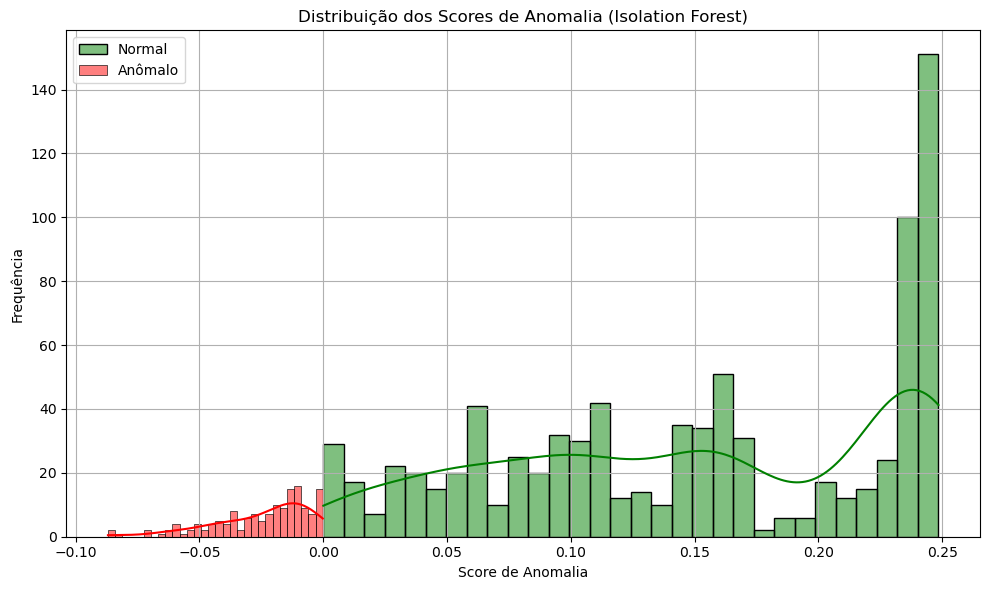

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar os dados normais e anômalos
normal_scores = df_anomalias[df_anomalias['Anomalia (IsolationForest)'] == 1]['Score de Anomalia']
anomalia_scores = df_anomalias[df_anomalias['Anomalia (IsolationForest)'] == -1]['Score de Anomalia']

# Plotar a distribuição dos scores
plt.figure(figsize=(10, 6))
sns.histplot(normal_scores, color='green', label='Normal', kde=True, bins=30)
sns.histplot(anomalia_scores, color='red', label='Anômalo', kde=True, bins=30)
plt.title('Distribuição dos Scores de Anomalia (Isolation Forest)')
plt.xlabel('Score de Anomalia')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.ensemble import IsolationForest

# Instanciando o modelo
clf = IsolationForest(contamination=0.15, random_state=42)


In [29]:
# Convertendo booleanos para inteiros
df_encoded = df.copy()
df_encoded['IP Anônimo'] = df_encoded['IP Anônimo'].astype(int)
df_encoded['Dispositivo Novo'] = df_encoded['Dispositivo Novo'].astype(int)
df_encoded['Localização Combina'] = df_encoded['Localização Combina'].astype(int)
df_encoded['Cadastro Incompleto'] = df_encoded['Cadastro Incompleto'].astype(int)
df_encoded['Tipo de Email'] = df_encoded['Tipo de Email'].map({'temporário': 1, 'confiável': 0})


In [31]:
X = df_encoded[['Tipo de Email', 'IP Anônimo', 'Dispositivo Novo', 'Tempo Formulário (seg)',
                'Localização Combina', 'Cadastro Incompleto']]


In [33]:
clf.fit(X)


IsolationForest(contamination=0.15, random_state=42)

In [35]:
df['Anomaly Score'] = clf.decision_function(X)


In [37]:
# Mapeia os níveis de risco para números
mapa_risco = {'baixo': 0, 'médio': 1, 'alto': 2}
df['Score Regras'] = df['Nível de Risco'].map(mapa_risco)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Score Anomalia Normalizado'] = scaler.fit_transform(df[['Anomaly Score']])
df['Score Regras Normalizado'] = scaler.fit_transform(df[['Score Regras']])


In [41]:
df['Score Final'] = (df['Score Anomalia Normalizado'] + df['Score Regras Normalizado']) / 2


In [43]:
def decisao_final(score):
    if score >= 0.7:
        return 'Rejeitar'
    elif score >= 0.4:
        return 'Revisar'
    else:
        return 'Aprovar'

df['Decisão'] = df['Score Final'].apply(decisao_final)


In [45]:
def decisao_final(row):
    if row['Nível de Risco'] == 'alto' or row['Anomaly Score'] < -0.2:
        return 'Rejeitar'
    elif row['Nível de Risco'] == 'médio' or row['Anomaly Score'] < 0:
        return 'Revisar'
    else:
        return 'Aprovar'

df['Decisão Final'] = df.apply(decisao_final, axis=1)


In [47]:
def style_decisao_final(df):
    styled_df = (df[['Tipo de Email', 'IP Anônimo', 'Dispositivo Novo',
                     'Tempo Formulário (seg)', 'Localização Combina',
                     'Cadastro Incompleto', 'Nível de Risco', 'Anomaly Score', 'Decisão Final']]
                 .style
                 .format({'Anomaly Score': '{:.3f}'})
                 .map(lambda val: 'color: red' if val == 'Rejeitar' else 
                                  ('color: orange' if val == 'Revisar' else 
                                   'color: green'), subset=['Decisão Final'])
                 .set_caption('Decisão Final por Regras + ML'))
    return styled_df

style_decisao_final(df.head(15))


,Tipo de Email,IP Anônimo,Dispositivo Novo,Tempo Formulário (seg),Localização Combina,Cadastro Incompleto,Nível de Risco,Anomaly Score,Decisão Final
0,confiável,False,False,11.300000,True,False,baixo,0.243,Aprovar
1,confiável,True,False,11.300000,True,False,baixo,0.115,Aprovar
2,confiável,False,False,6.800000,True,True,médio,0.085,Revisar
3,confiável,False,False,10.300000,True,False,baixo,0.240,Aprovar
4,temporário,False,True,10.200000,True,False,baixo,0.011,Aprovar
5,confiável,True,False,11.100000,True,False,baixo,0.114,Aprovar
6,confiável,False,True,14.200000,True,True,baixo,0.055,Aprovar
7,confiável,False,False,12.500000,True,False,baixo,0.246,Aprovar
8,confiável,False,False,10.000000,True,False,baixo,0.240,Aprovar
9,confiável,False,True,13.800000,True,True,baixo,0.059,Aprovar


In [49]:
df['Decisão Final'].value_counts()


Decisão Final
Aprovar     758
Rejeitar    136
Revisar     106
Name: count, dtype: int64

In [51]:
# Simular rótulo real com base no nível de risco (para o exercício)
def simular_feedback(row):
    if row['Decisão Final'] == 'Rejeitar':
        return np.random.choice(['fraude', 'não fraude'], p=[0.9, 0.1])
    elif row['Decisão Final'] == 'Revisar':
        return np.random.choice(['fraude', 'não fraude'], p=[0.5, 0.5])
    else:
        return np.random.choice(['fraude', 'não fraude'], p=[0.05, 0.95])

df['Feedback Real'] = df.apply(simular_feedback, axis=1)


In [53]:
pd.crosstab(df['Decisão Final'], df['Feedback Real'], margins=True)


Feedback Real,fraude,não fraude,All
Decisão Final,,,
Aprovar,41,717,758
Rejeitar,122,14,136
Revisar,56,50,106
All,219,781,1000


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Preparar base com feedbacks conhecidos
df_feedback = df.copy()
df_feedback['Fraude Real'] = df_feedback['Feedback Real'].map({'fraude': 1, 'não fraude': 0})

# Features e target
X_feedback = pd.get_dummies(df_feedback[[
    'Tipo de Email', 'IP Anônimo', 'Dispositivo Novo',
    'Tempo Formulário (seg)', 'Localização Combina', 'Cadastro Incompleto'
]], drop_first=True)
y_feedback = df_feedback['Fraude Real']

# Treinamento do novo modelo
modelo_feedback = DecisionTreeClassifier(max_depth=4)
modelo_feedback.fit(X_feedback, y_feedback)


DecisionTreeClassifier(max_depth=4)

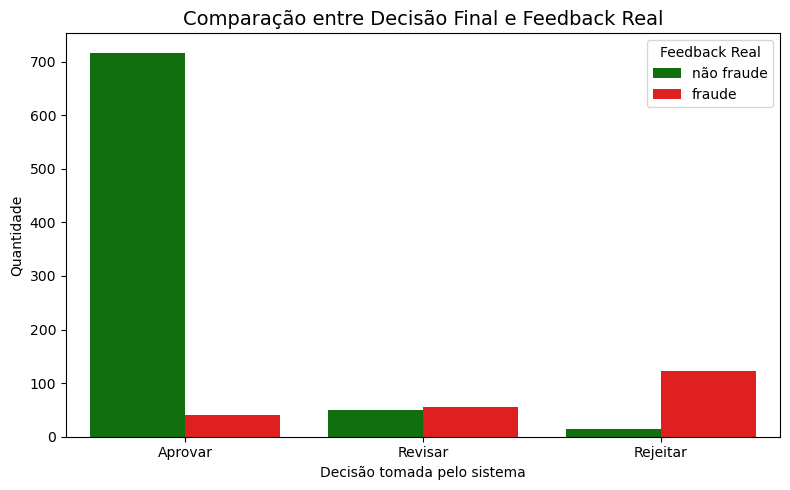

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Decisão Final',
    hue='Feedback Real',
    palette={'fraude': 'red', 'não fraude': 'green'}
)

plt.title('Comparação entre Decisão Final e Feedback Real', fontsize=14)
plt.xlabel('Decisão tomada pelo sistema')
plt.ylabel('Quantidade')
plt.legend(title='Feedback Real')
plt.tight_layout()
plt.show()


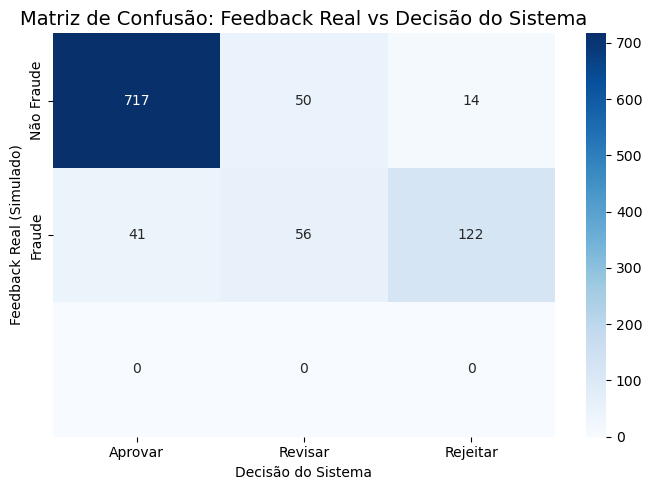

In [59]:
from sklearn.metrics import confusion_matrix

# Convertendo a decisão final em números para comparar
mapa_decisao = {'Aprovar': 0, 'Revisar': 1, 'Rejeitar': 2}
mapa_feedback = {'não fraude': 0, 'fraude': 1}

df['Decisão_Num'] = df['Decisão Final'].map(mapa_decisao)
df['Feedback_Num'] = df['Feedback Real'].map(mapa_feedback)

# Matriz de confusão
matriz = confusion_matrix(df['Feedback_Num'], df['Decisão_Num'])

# Exibir o heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    matriz,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Aprovar', 'Revisar', 'Rejeitar'],
    yticklabels=['Não Fraude', 'Fraude']
)

plt.title('Matriz de Confusão: Feedback Real vs Decisão do Sistema', fontsize=14)
plt.xlabel('Decisão do Sistema')
plt.ylabel('Feedback Real (Simulado)')
plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import accuracy_score

# Acurácia: % de decisões corretas
acuracia = accuracy_score(df['Feedback_Num'], df['Decisão_Num'])

print(f"Acurácia com Feedback: {acuracia:.2%}")


Acurácia com Feedback: 77.30%


In [63]:
from sklearn.metrics import confusion_matrix

# Recalcular matriz
matriz = confusion_matrix(df['Feedback_Num'], df['Decisão_Num'])

# Fraudes são 1, não fraudes são 0
# Lógica: linhas = verdadeiros, colunas = predições
verdadeiros_negativos = matriz[0, 0]  # Não fraude previsto como Aprovar
falsos_positivos = matriz[0, 2]       # Não fraude previsto como Rejeitar
falsos_negativos = matriz[1, 0]       # Fraude prevista como Aprovar
verdadeiros_positivos = matriz[1, 2]  # Fraude prevista como Rejeitar

total_fraudes = matriz[1].sum()
total_nao_fraudes = matriz[0].sum()

taxa_fp = falsos_positivos / total_nao_fraudes
taxa_fn = falsos_negativos / total_fraudes

print(f"Taxa de Falsos Positivos: {taxa_fp:.2%}")
print(f"Taxa de Falsos Negativos: {taxa_fn:.2%}")


Taxa de Falsos Positivos: 1.79%
Taxa de Falsos Negativos: 18.72%


In [65]:
# Correção simulada: modelo aprende a rejeitar fraudes no futuro
df['Decisão Corrigida'] = df.apply(lambda row: 'Rejeitar' if row['Feedback Real'] == 'fraude' else 'Aprovar', axis=1)

# Mapear para números
df['Decisão Corrigida_Num'] = df['Decisão Corrigida'].map(mapa_decisao)

# Avaliar nova acurácia
nova_acuracia = accuracy_score(df['Feedback_Num'], df['Decisão Corrigida_Num'])

print(f"Acurácia original do sistema: {acuracia:.2%}")
print(f"Acurácia após aprendizado com feedback: {nova_acuracia:.2%}")


Acurácia original do sistema: 77.30%
Acurácia após aprendizado com feedback: 78.10%


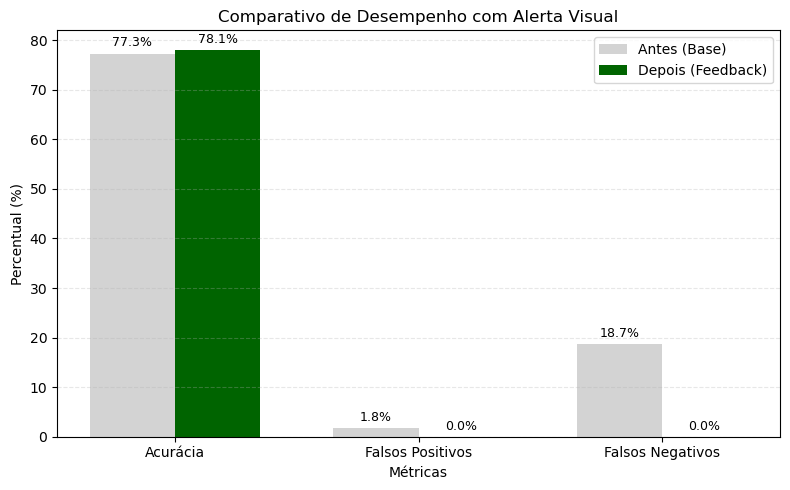

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas avaliadas
metricas = ['Acurácia', 'Falsos Positivos', 'Falsos Negativos']

# Valores antes e depois (em %)
antes = [77.3, 1.79, 18.72]
depois = [78.1, 0.0, 0.0]

# Cores customizadas por métrica (verde p/ melhora, vermelho p/ erro)
cores_depois = ['darkgreen', 'red' if depois[1] > 0 else 'darkgreen', 'red' if depois[2] > 0 else 'darkgreen']
cores_antes = ['lightgray'] * 3

# Posições e largura
bar_width = 0.35
index = np.arange(len(metricas))

# Criação do gráfico
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(index, antes, bar_width, label='Antes (Base)', color=cores_antes)
bars2 = ax.bar(index + bar_width, depois, bar_width, label='Depois (Feedback)', color=cores_depois)

# Rótulos e títulos
ax.set_xlabel('Métricas')
ax.set_ylabel('Percentual (%)')
ax.set_title('Comparativo de Desempenho com Alerta Visual')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metricas)
ax.legend()

# Função para colocar os valores em cima das barras
def adicionar_valores(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.1f}%',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

adicionar_valores(bars1)
adicionar_valores(bars2)

# Linhas de grade suaves
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
